## I'm using the jupyter notebook to load and play with the bottle data from the 2011 S4P cruise
On S4P 2011 they took 527 noble gas samples that are in the data base.

I think I recall Sarah P saying that maybe the first half of this data is bad????

## NOTES from meeting with Brice and Sarah P:

First three stations of S4P are very young. This is the outflow at the western edge of new AABW. We should try to capture this. Deep water was found at 2000m (is that right?), but was variable - so there is need to sample a big range. 

Read the 2016 Loose paper to think about linking sea ice with its influence on aabw. Roo N and Roberta H are putting together a global database of noble gases and would like this stuff too. 

Stephane Downs - papers on tagging lower CDW coming onto the shelf with He3/4 tracers: "Tracing Southwest Pacific Bottom Water Using Potential Vorticity and Helium-3" - JPO 2012

Sarah P thinks resolving the budget of AABW should be the focus. 


## It seems like you want to focus on the first few stations, and perhaps a bounding box of the Ross. 

From Purkey et al 2018 it looks like the AABW core is found along the bottom from 1000-2000m or so, with high CFCs again near the surface.


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_style("darkgrid")



In [3]:
# use pd.read_csv() to load the bottle data 
# Lets try to do it directly from the web!
url = 'https://cchdo.ucsd.edu/data/13480/320620110219_hy1.csv'
# data = pd.read_csv(url) 
data = pd.read_csv(url, comment ='#', skiprows=[0,-1], header= [0,1], na_values='-999') 

print(type(data))

# for some reason you had to get both header columns. Now let's drop the second one that contains the units
data.columns = data.columns.droplevel(1)

# take a look. if you dont use the print() command in notebooks, then the formatting is better.
data.head() 


<class 'pandas.core.frame.DataFrame'>


,EXPOCODE,SECT_ID,STNNBR,CASTNO,SAMPNO,BTLNBR,BTLNBR_FLAG_W,DATE,TIME,LATITUDE,...,HELIER,DELHER,THETA,LDEO_SAMPNO,ABSORBTION,ABSORBTION_FLAG_W,IMAGE_COUNT,IMAGE_COUNT_FLAG_W,CYTO_COUNT,CYTO_COUNT_FLAG_W
0,320620110219,S04P,2.0,1.0,9.0,9.0,2.0,20110222.0,2154.0,-70.6545,...,0.0,0.203,-1.3244,5.000020e+10,NaN,9.0,NaN,9.0,NaN,9.0
1,320620110219,S04P,2.0,1.0,8.0,8.0,2.0,20110222.0,2151.0,-70.6545,...,0.0,0.200,-1.1812,5.000020e+10,NaN,9.0,NaN,9.0,NaN,9.0
2,320620110219,S04P,2.0,1.0,7.0,7.0,2.0,20110222.0,2148.0,-70.6545,...,0.0,0.201,-1.1584,5.000020e+10,NaN,9.0,NaN,9.0,NaN,9.0
3,320620110219,S04P,2.0,1.0,6.0,6.0,2.0,20110222.0,2146.0,-70.6545,...,NaN,NaN,-1.1488,NaN,NaN,9.0,NaN,9.0,NaN,9.0
4,320620110219,S04P,2.0,1.0,5.0,5.0,2.0,20110222.0,2144.0,-70.6545,...,0.0,0.190,-1.1046,5.000020e+10,NaN,9.0,NaN,9.0,NaN,9.0


In [4]:
# also what are all the column names?
# you should think about looking at this, then just subsetting out what you think you will need
# this has a multi-index because of the second row of units
data.columns


Index(['EXPOCODE', 'SECT_ID', 'STNNBR', 'CASTNO', 'SAMPNO', 'BTLNBR',
       'BTLNBR_FLAG_W', 'DATE', 'TIME', 'LATITUDE',
       ...
       'HELIER', 'DELHER', 'THETA', 'LDEO_SAMPNO', 'ABSORBTION',
       'ABSORBTION_FLAG_W', 'IMAGE_COUNT', 'IMAGE_COUNT_FLAG_W', 'CYTO_COUNT',
       'CYTO_COUNT_FLAG_W'],
      dtype='object', length=106)

In [5]:
# check out the shape
data.shape

(4413, 106)

In [6]:
# what else is in there?

cruise_inds = data.SECT_ID.value_counts() 

print(data.SECT_ID.value_counts())

cruise_list = list(cruise_inds.index.values)
print(cruise_list)

       S04P    2976
       P16S     714
       P15S     617
        ERS      49
       P18S      36
     DIPOLE      20
Name: SECT_ID, dtype: int64
['       S04P', '       P16S', '       P15S', '        ERS', '       P18S', '     DIPOLE']


Weird! there is a bunch of data from other cruises in there. I don't know why. Let's make sure to clean this up and only take S04P data. 

Actually, on this cruise the ship occupied other lines, so those got named accordingly. I think it's still part of the same cruise, so it shouldn't get droppped.

In [7]:
# clean up the data. drop the rows where salinity is nan
# drop rows where it's not s04p'
data_clean = data.dropna(subset=['SALNTY'])

# check that everything comes from the same cruise
print(data.EXPOCODE.value_counts())

# data_clean.drop( cruise_list.index[1:] , inplace=True)
# data_clean = data_clean[ data_clean.SECT_ID == cruise_list[0]]
data_clean.shape 

320620110219    4412
END_DATA           1
Name: EXPOCODE, dtype: int64


(4371, 106)

In [8]:
# also, let's extract the rows with noble gas data 

df_he = data_clean.dropna(subset=['HELIUM'])
df_he.shape

(527, 106)

In [9]:
# find out all the info, can tell you about missing values
data_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4371 entries, 0 to 4411
Columns: 106 entries, EXPOCODE to CYTO_COUNT_FLAG_W
dtypes: float64(104), object(2)
memory usage: 3.6+ MB


#### EDA : exploratory data analysis!

you can use frequency counts to look at the data and explore it
note that you can select a column using bracket OR dot notation
Do Summary statistics on numeric columns, you can also look at non numeric columns by using .value_counts()

In [10]:
# EDA: calculate descriptive statistics using the .describe() method
data_clean.HELIUM.describe()

count    527.000000
mean       2.009833
std        0.314038
min        1.839000
25%        1.940000
50%        1.991000
75%        2.044500
max        8.957000
Name: HELIUM, dtype: float64

boy, looks like a lot of -999s (not anymore!).

You know this isn't right for the nmol/kg values for He. probably this is the missing data format. 

So I went back an loaded it using na_values='-999' to sub in nans.

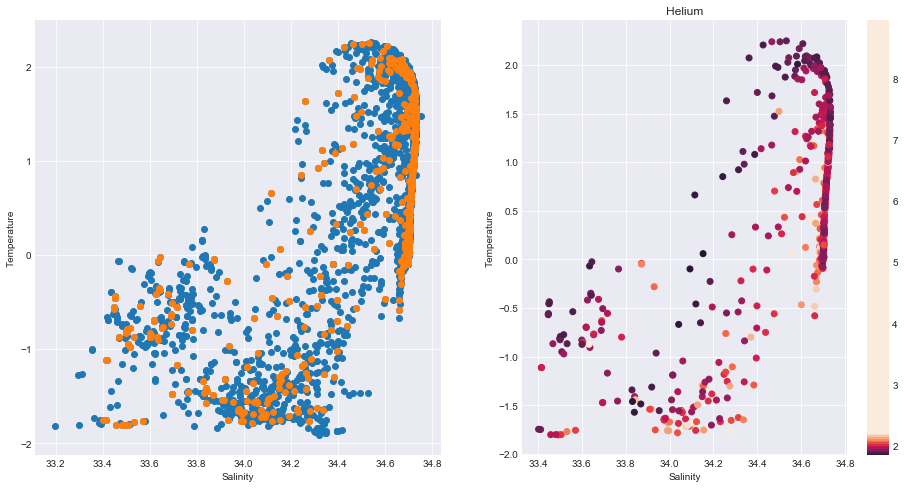

In [11]:

# make some plots


plt.figure( figsize=(16,8))
plt.subplot(1, 2, 1)
plt.scatter(data_clean['SALNTY'], data_clean['THETA']) 
plt.scatter(df_he['SALNTY'], df_he['THETA'])
plt.xlabel('Salinity')
plt.ylabel('Temperature')

plt.subplot(1, 2, 2)
plt.scatter(df_he['SALNTY'], df_he['THETA'], c = df_he.HELIUM)
cb = plt.colorbar()
cb.set_clim(1.8, 2.2)
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.title('Helium')




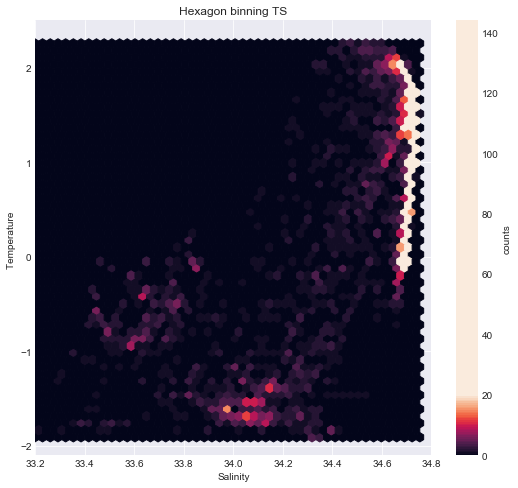

In [12]:
# df[df.name.notnull()] this will remove the nans! - or maybe not?

fig, axs = plt.subplots(ncols=1, sharey=True, figsize=(8, 8))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
# hb = ax.hexbin(data['SALNTY'].apply(lambda x: x if ~np.isnan(x) else -10), data['THETA'].apply(lambda x: x if ~np.isnan(x) else -10))
hb = plt.hexbin( data_clean.SALNTY, data_clean.THETA, gridsize=50 )
axs.axis([33.2, 34.8, -2.1, 2.5])
axs.set_title("Hexagon binning TS")
plt.xlabel('Salinity')
plt.ylabel('Temperature ')
cb = fig.colorbar(hb, ax=axs)
cb.set_label('counts')
cb.set_clim(0,20)




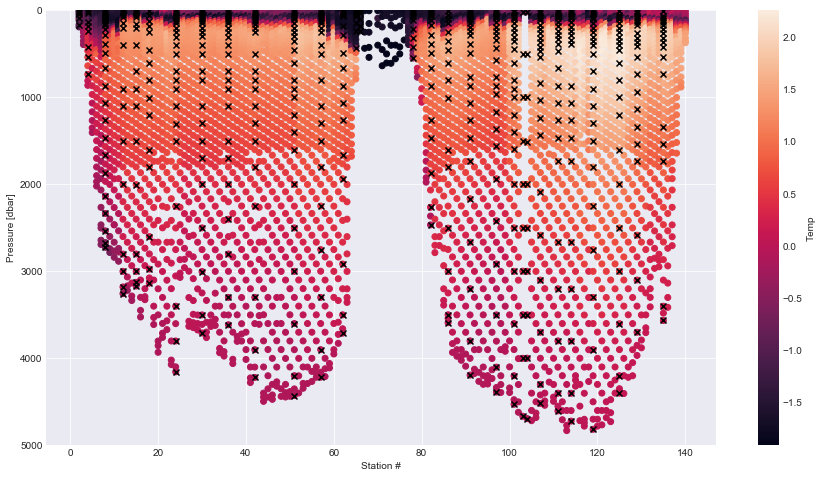

In [13]:

fig, axs = plt.subplots(ncols=1, sharey=True, figsize=(15, 8))
sc = plt.scatter( data_clean['STNNBR'], data_clean['CTDPRS'],  c = data_clean['THETA']) 
plt.scatter(df_he.STNNBR, df_he.CTDPRS, c='k', marker='x' )
plt.xlabel('Station #')
plt.ylabel('Pressure [dbar]')
axs.set_ylim(5000, 0)
cb = fig.colorbar(sc)
cb.set_label('Temp')



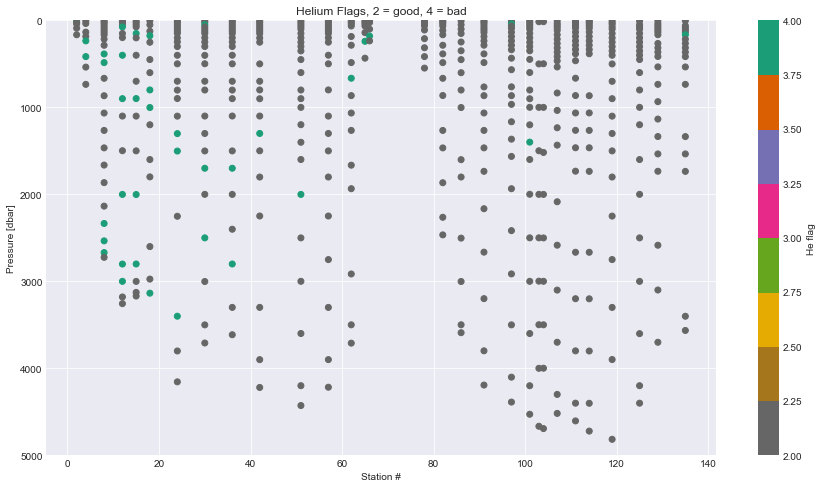

In [14]:
# try to find and plot the Helium flags:
#  2 = acceptable measurement
#  4 = bad measurement

fig, axs = plt.subplots(ncols=1, sharey=True, figsize=(15, 8))
sc = plt.scatter( df_he.STNNBR, df_he.CTDPRS,  c = df_he.HELIUM_FLAG_W, cmap=plt.cm.Dark2_r ) 
plt.xlabel('Station #')
plt.ylabel('Pressure [dbar]')
plt.title('Helium Flags, 2 = good, 4 = bad')
axs.set_ylim(5000, 0)
cb = fig.colorbar(sc)
cb.set_label('He flag')


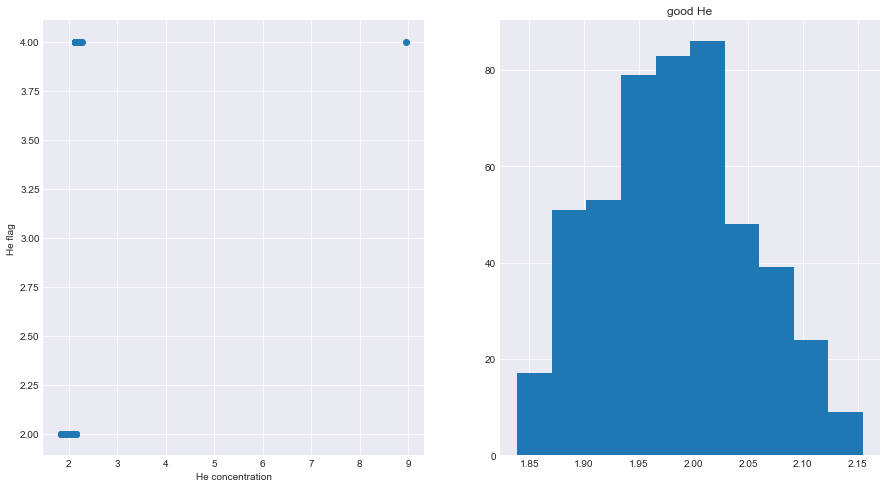

In [15]:

fig, axs = plt.subplots(ncols=2, sharey=False, figsize=(15, 8))
axs[0].scatter(df_he.HELIUM, df_he.HELIUM_FLAG_W)
axs[0].set_xlabel('He concentration')
axs[0].set_ylabel('He flag')

axs[1].hist(df_he.HELIUM[df_he.HELIUM_FLAG_W < 4])
axs[1].set_title('good He')


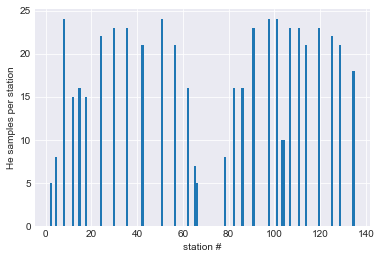

In [16]:
plt.hist(df_he.STNNBR, bins=140);
plt.xlabel('station #')
plt.ylabel('He samples per station')

(5000, 0)

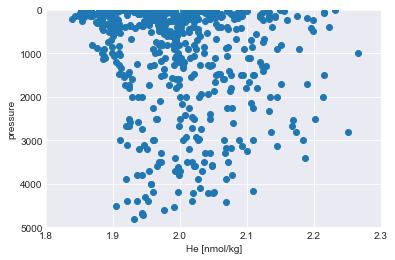

In [17]:
# plot the He bottle depths:

plt.scatter(df_he.HELIUM, df_he.CTDPRS)
plt.ylabel('pressure')
plt.xlabel('He [nmol/kg]')
plt.xlim([1.8, 2.3])
plt.ylim([5000, 0])

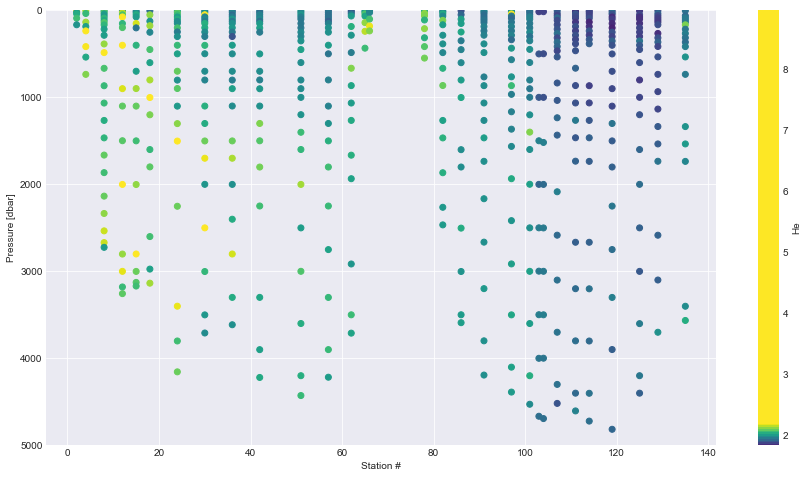

In [18]:
# plot the He concentrations.
# You should probably be plotting Delta He

fig, axs = plt.subplots(ncols=1, sharey=True, figsize=(15, 8))
sc = plt.scatter( data_clean['STNNBR'], data_clean['CTDPRS'],  c = data_clean['HELIUM'], cmap=plt.cm.viridis) 
plt.xlabel('Station #')
plt.ylabel('Pressure [dbar]')
axs.set_ylim(5000, 0)
cb = fig.colorbar(sc)
cb.set_label('He')
cb.set_clim(1.8, 2.2)

In [19]:
# hay man, magic commands let you do shell stuff in the notebook!
! ls
! pwd

320620110219_hy1.csv
320620110219_nc_hyd
plot_h3_2011_usingCSV_old_conflict.ipynb
plot_h3_2011_usingCSV_old_conflict.ipynb copy
plot_s4p2011.py
s4p2011_He_look.py
unti1.ipynb
unti2.ipynb
/Users/beaird/Google Drive/data/S4P/2011/bottle_data


/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


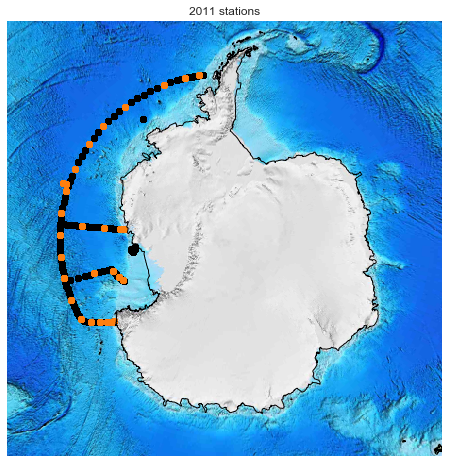

In [24]:
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.

fig, axs = plt.subplots(ncols=1, sharey=True, figsize=(15, 8))

m = Basemap( resolution='i', projection='spstere', lon_0 = 115, boundinglat = -60)

x, y = m( data_clean.LONGITUDE.values, data_clean.LATITUDE.values )
xHe_2011, yHe_2011 = m( df_he.LONGITUDE.values, df_he.LATITUDE.values )

m.scatter( x, y, c='k')
m.scatter( xHe_2011, yHe_2011, c='tab:orange')
m.drawcoastlines()
m.etopo(scale=0.5) # displays an image (from http://www.ngdc.noaa.gov/mgg/global/global.html) it's big
axs.set_title('2011 stations')


## lets also load and plot the station plan for 2018

I'm suprised that the first station is at 74 m depth, and the next is over 1000. shouldn't there be something in between?

In [21]:
# load the 2018 station plan
sta_plan_cols = ['station', 'lat', 'lon', 'bttm_pres']
# df_2018 = pd.read_csv('../../2018/s04p_2018_pc2.txt', sep='\t', header=None, skiprows=[0, 1], names=sta_plan_cols)
df_2018 = pd.read_csv('../../2018/s04p_2018_pc0.csv')
# rename the columns so they don't have spaces
df_2018.columns = sta_plan_cols
print(df_2018.head())


   station    lat     lon  bttm_pres
0        0 -42.88  147.32          0
1        1 -70.65  168.07         74
2        2 -70.32  168.63       1411
3        3 -69.99  169.20       2426
4        4 -69.67  169.77       2682


/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


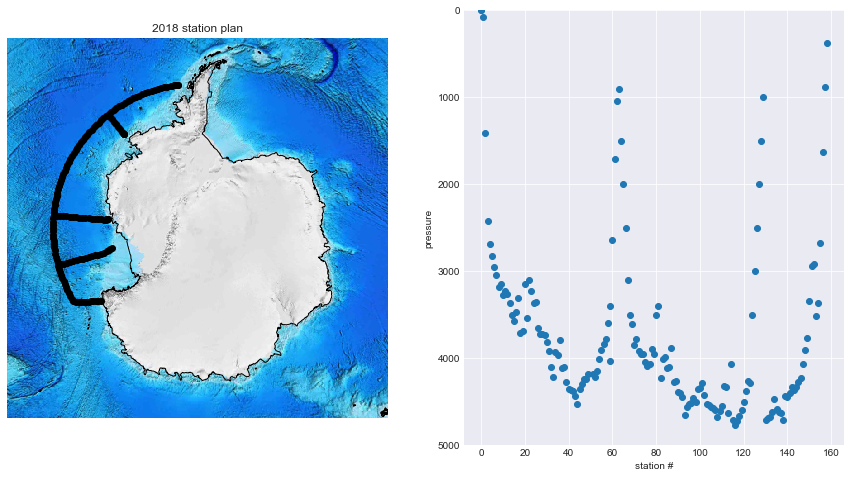

In [25]:
fig, axs = plt.subplots(ncols=2,  figsize=(15, 8))


m = Basemap( resolution='i', projection='spstere', lon_0 = 115, boundinglat = -60)

x_2018, y_2018 = m( df_2018.lon.values, df_2018.lat.values )
plt.subplot(121)
m.scatter( x_2018, y_2018, c='k')
m.drawcoastlines()
m.etopo(scale=0.5) # displays an image (from http://www.ngdc.noaa.gov/mgg/global/global.html) it's big
plt.title('2018 station plan')

plt.subplot(122)
plt.scatter(df_2018.station, df_2018.bttm_pres)
plt.ylim([5000, 0])
plt.ylabel('bottom pressure')
plt.xlabel('station #')


## next lets look try to find the stations in 2018 closest to the 2011 stations

In [55]:
I =  np.array([])

for s in range(len(xHe_2011)):
    
    dist =  (xHe_2011[s]-x_2018)**2 + (yHe_2011[s]-y_2018)**2 
   
    I = np.append( I,  np.where(dist == min(dist)) )

In [62]:

uI = np.unique(I).astype(int)
uI

array([  1,   2,   3,   6,   9,  13,  19,  25,  31,  37,  46,  52,  58,
        62,  67,  69,  74,  84,  90,  92,  96, 104, 110, 130, 142, 147, 153])

/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


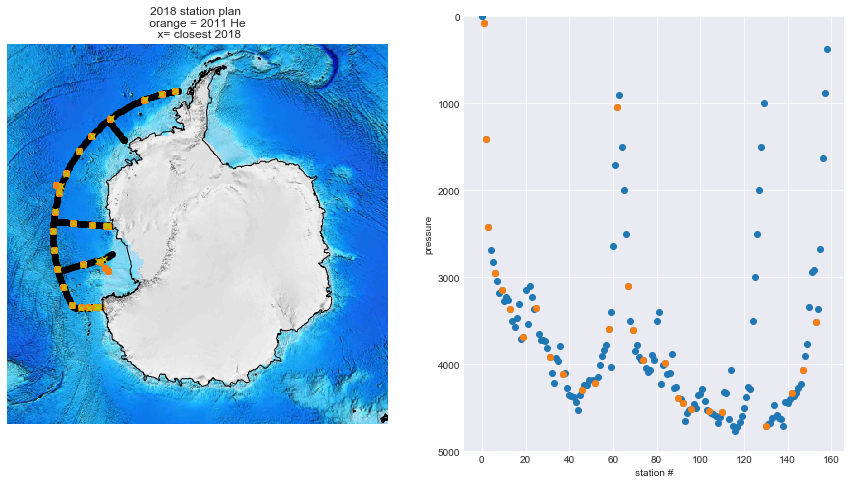

In [69]:
fig, axs = plt.subplots(ncols=2,  figsize=(15, 8))


m = Basemap( resolution='i', projection='spstere', lon_0 = 115, boundinglat = -60)

x_2018, y_2018 = m( df_2018.lon.values, df_2018.lat.values )
plt.subplot(121)
m.scatter( x_2018, y_2018, c='k')
m.scatter( xHe_2011, yHe_2011, c='tab:orange')
m.scatter( x_2018[uI], y_2018[uI], c='y', marker='x')
m.drawcoastlines()
m.etopo(scale=0.5) # displays an image (from http://www.ngdc.noaa.gov/mgg/global/global.html) it's big
plt.title('2018 station plan \n orange = 2011 He \n x= closest 2018')

plt.subplot(122)
plt.scatter(df_2018.station, df_2018.bttm_pres)
plt.scatter(df_2018.station[uI], df_2018.bttm_pres[uI])
plt.ylim([5000, 0])
plt.ylabel('bottom pressure')
plt.xlabel('station #')

## let's take most of the stations we just found, remove some weird picks, and add some slope stations manually and see what we come up with

Remove 1, since it's so shallow

increase stations between 58 and 67 to get more on the Ross slope sections

remove 92, which is only there because of something weird. 

add some on the P18S line (sta~120+)

In [84]:
He_sta_2018 = [  2,   3, 4,   6,   9,  13,  19,  25,  31,  37,  46,  52,  58, 60, 
        62, 63, 65, 67,  69,  74,  84,  90,  96, 104, 110, 120, 125, 127, 129, 130, 142, 147, 153]

len(He_sta_2018)

33

## Plot what you just defined

/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


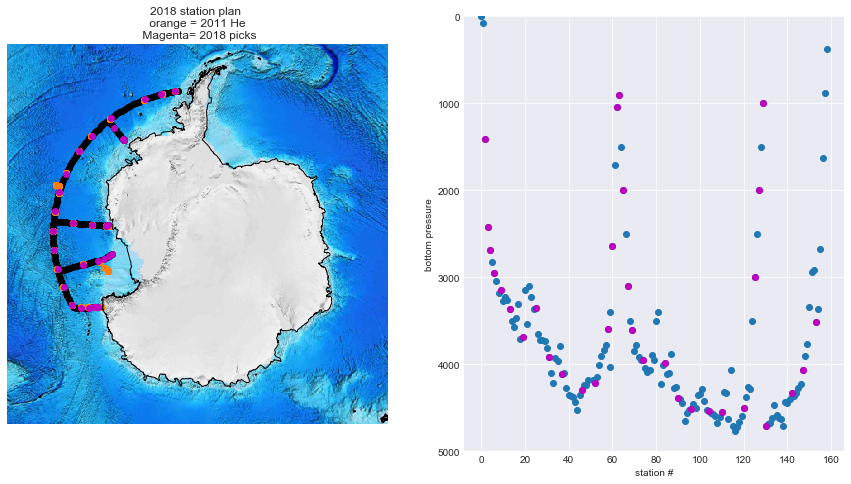

In [82]:
fig, axs = plt.subplots(ncols=2,  figsize=(15, 8))


m = Basemap( resolution='i', projection='spstere', lon_0 = 115, boundinglat = -60)

x_2018, y_2018 = m( df_2018.lon.values, df_2018.lat.values )
plt.subplot(121)
m.scatter( x_2018, y_2018, c='k')
m.scatter( xHe_2011, yHe_2011, c='tab:orange')
m.scatter( x_2018[He_sta_2018], y_2018[He_sta_2018], c='m')
m.drawcoastlines()
m.etopo(scale=0.5) # displays an image (from http://www.ngdc.noaa.gov/mgg/global/global.html) it's big
plt.title('2018 station plan \n orange = 2011 He \n Magenta= 2018 picks')

plt.subplot(122)
plt.scatter(df_2018.station, df_2018.bttm_pres)
plt.scatter(df_2018.station[He_sta_2018], df_2018.bttm_pres[He_sta_2018], c='m')
plt.ylim([5000, 0])
plt.ylabel('bottom pressure')
plt.xlabel('station #')